<a href="https://colab.research.google.com/github/krheams60/Sales-predictions/blob/main/Project2_Part4_Ken_Rheams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 - Annual Income Worldwide
Survey of Individuals with Income under 50,000 and over 50,000

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [71]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import (ColumnTransformer, make_column_selector,
                             make_column_transformer)
from sklearn.metrics import (roc_auc_score,
                             PrecisionRecallDisplay, RocCurveDisplay,
                             f1_score, accuracy_score, classification_report)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn import set_config
set_config(display='diagram')

In [5]:
# Load data
df = pd.read_csv('/content/archive.zip')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
# Make copy 
eda_df = df.copy()

In [7]:
# Check for missing or erroneous data, there are no missing values
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
# Check for missing data and there is no missing data
eda_df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
# Check for duplicates
eda_df.duplicated().sum()

52

In [10]:
# drop duplicates
eda_df.drop_duplicates(inplace=True)

In [11]:
# duplicates dropped
eda_df.duplicated().sum()

0

In [12]:
# Dropped columns that has no revelance to finding income range
df = df.drop(columns=['fnlwgt', 'educational-num', 'relationship', 'workclass'])
df.head()


,age,education,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,11th,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K
1,38,HS-grad,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K
2,28,Assoc-acdm,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K
3,44,Some-college,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K
4,18,Some-college,Never-married,?,White,Female,0,0,30,United-States,<=50K


In [13]:
# value count of <=50K and >50K
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [14]:
# Replace income column with binary values
df['income'].replace({'<=50K':0, '>50K':1}, inplace=True)

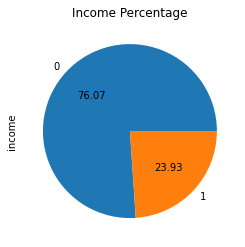

In [15]:
# Pie chart for income values
df['income'].value_counts().plot(kind="pie", autopct="%.2f")
plt.title("Income Percentage")
plt.show()

 - The pie chart shows that 76.07% have less or equal to $50,000 annual income
 

 - The breakdown of income per country shows the majority of countries that have
 - less annual income are the less developed countries and lower GDP than the
 - more developed industrialized countries. More education and investments are
 - needed to help improve the income across the board.

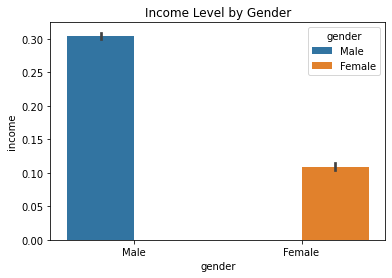

In [16]:
sns.barplot(data=df, x="gender", y="income", hue="gender")
plt.title("Income Level by Gender");

 - This graph shows the income level for Male and Female with Males having a
 - higher income than Females almost 3 times more
 

 - There needs to be more availability as far as education and employment 
 - opportunities for female employees so as to close the gap on income earnings.

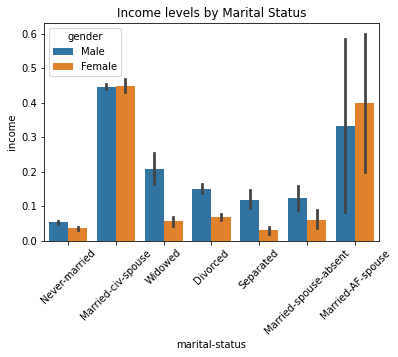

In [17]:
sns.barplot(data=df, x="marital-status", y="income", hue="gender")
plt.title("Income levels by Marital Status")
plt.xticks(rotation = 45);

 - The graph shows the marital status of males and females and having the males
 - overall with a higher income except for Married with spouse
 

 - The workforce across the globe that includes all of the countries needs to
 - have better programs and access for females that are not married,divorced,
 - separated or the only income provider to better their income levels.

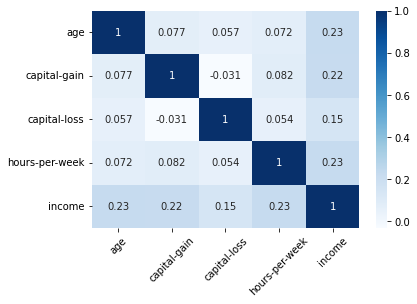

In [18]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True)
plt.xticks(rotation = 45);

 - The correlation between the different features shows a very low correlation
 - among all the features that contribute to the average income level.

 - This section is for applying different models and metrics to predict the 
 - overall percentages of annual income using the best model for the prediction.

In [19]:
X = df.drop(columns='income')
y = df['income']

In [20]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
# Check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   education       48842 non-null  object
 2   marital-status  48842 non-null  object
 3   occupation      48842 non-null  object
 4   race            48842 non-null  object
 5   gender          48842 non-null  object
 6   capital-gain    48842 non-null  int64 
 7   capital-loss    48842 non-null  int64 
 8   hours-per-week  48842 non-null  int64 
 9   native-country  48842 non-null  object
 10  income          48842 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 4.1+ MB


In [22]:
df.dropna(subset=['education'], inplace=True)
df.isna().sum()

age               0
education         0
marital-status    0
occupation        0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [23]:
# Summary statistics of the data
df.describe()

,age,capital-gain,capital-loss,hours-per-week,income
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1079.067626,87.502314,40.422382,0.239282
std,13.710510,7452.019058,403.004552,12.391444,0.426649
min,17.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,99999.000000,4356.000000,99.000000,1.000000


In [24]:
# Check class balance
y_train.value_counts(normalize=True)

0    0.758947
1    0.241053
Name: income, dtype: float64

In [25]:
# Imputers used
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')

In [26]:
# Tuples for column transformer and made pipeline
cat_select = make_column_selector(dtype_include='object')
num_select = make_column_selector(dtype_include='number')

scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

num_pipe = make_pipeline(median_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe)

num_tuple = (num_pipe, num_select)
cat_tuple = (cat_pipe, cat_select)

processor = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')

In [27]:
# Fit and transform train and test
processor.fit(X_train)
X_train_processed = processor.transform(X_train)
X_test_processed = processor.transform(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [28]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (36631, 91)




array([[ 0.17177061, -0.14450843,  5.71188483, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.02605707, -0.14450843, -0.22025127, ...,  0.        ,
         0.        ,  0.        ],
       [-0.33822677, -0.14450843, -0.22025127, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.77536738, -0.14450843, -0.22025127, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.53605445, -0.14450843, -0.22025127, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.48319243, -0.14450843, -0.22025127, ...,  1.        ,
         0.        ,  0.        ]])

In [29]:
logreg = LogisticRegression()
logreg_pipe = make_pipeline(processor, logreg)
logreg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f49ab1cfe20>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f49ab1cf730>)])),
                ('logisticregression', LogisticRegression())])

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36631 entries, 27859 to 15795
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             36631 non-null  int64 
 1   education       36631 non-null  object
 2   marital-status  36631 non-null  object
 3   occupation      36631 non-null  object
 4   race            36631 non-null  object
 5   gender          36631 non-null  object
 6   capital-gain    36631 non-null  int64 
 7   capital-loss    36631 non-null  int64 
 8   hours-per-week  36631 non-null  int64 
 9   native-country  36631 non-null  object
dtypes: int64(4), object(6)
memory usage: 3.1+ MB


In [31]:
logreg_pipe.fit(X_train, y_train)
training_predictions = logreg_pipe.predict(X_train)
test_predictions = logreg_pipe.predict(X_test)
training_predictions[:10]

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0])

In [32]:
dec_tree = DecisionTreeClassifier(random_state = 42)
dec_tree_pipe = make_pipeline(processor, dec_tree)
dec_tree_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f49ab1cfe20>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f49ab1cf730>)])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [33]:
dec_tree_pipe.fit(X_train, y_train)

dec_tree_training_predictions = dec_tree_pipe.predict(X_train)
dec_tree_test_predictions = dec_tree_pipe.predict(X_test)
dec_tree_training_predictions[:10]

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0])

In [34]:
train_score = dec_tree_pipe.score(X_train, y_train)
test_score = dec_tree_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

0.9623815893641997
0.8257308983703219


In [35]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [36]:
dec_tree.get_depth()

47

In [37]:
depths = list(range(2, 47))
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dec_tree_pipe.fit(X_train, y_train)
    train_score = dec_tree_pipe.score(X_train, y_train)
    test_score = dec_tree_pipe.score(X_test, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` 

In [38]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
2,0.825731,0.962382
25,0.825731,0.962382
27,0.825731,0.962382
28,0.825731,0.962382
29,0.825731,0.962382


In [39]:
rf = RandomForestClassifier(random_state = 42)
rf_pipe = make_pipeline(processor, rf)
rf_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f49ab1cfe20>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f49ab1cf730>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [40]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [41]:
rf_pipe.fit(X_train, y_train)

rf_training_predictions = rf_pipe.predict(X_train)
rf_test_predictions = rf_pipe.predict(X_test)
rf_training_predictions[:10]

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0])

In [42]:
train_score = rf_pipe.score(X_train, y_train)
test_score = rf_pipe.score(X_test, y_test)
print(train_score)
print(test_score)

0.9622723922360842
0.8469412824502498


In [44]:
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

76

In [45]:
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   rf = RandomForestClassifier(max_depth=depth)
   rf_pipe.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = rf_pipe.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = rf_pipe.score(X_test, y_test)
   scores.head()

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` 

In [46]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
1,0.846941,0.962272
57,0.846941,0.962272
55,0.846941,0.962272
54,0.846941,0.962272
53,0.846941,0.962272


In [47]:
n_ests = [50, 100, 150, 200, 250]
scores2 = pd.DataFrame(index=n_ests, columns=['Test Score', 'Train Score'])
for n in n_ests:
   model = RandomForestClassifier(max_depth=52, n_estimators=n)
   rf_pipe.fit(X_train, y_train)
   scores2.loc[n, 'Train Score'] = rf_pipe.score(X_train, y_train)
   scores2.loc[n, 'Test Score'] = rf_pipe.score(X_test, y_test)
scores2.head()

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` 

,Test Score,Train Score
50,0.846941,0.962272
100,0.846941,0.962272
150,0.846941,0.962272
200,0.846941,0.962272
250,0.846941,0.962272


In [48]:
pca = PCA(n_components=.95)
pca.fit(X_train_processed)
X_train_processed_pca = pca.transform(X_train_processed)
X_test_processed_pca = pca.transform(X_test_processed)


In [49]:
print(X_train_processed_pca.shape)

(36631, 27)


In [50]:
logreg = LogisticRegression()

logreg.fit(X_train_processed_pca, y_train)

LogisticRegression()

In [51]:
train_preds = logreg.predict(X_train_processed_pca)
train_preds
logreg.score(X_train_processed_pca,y_train)

0.8442848953072534

In [52]:
logreg.fit(X_test_processed_pca, y_test)

LogisticRegression()

In [53]:
train_preds = logreg.predict(X_test_processed_pca)
train_preds
logreg.score(X_test_processed_pca,y_test)

0.852919498812546

In [54]:
pipe = make_pipeline(
    StandardScaler(),
    PCA(),
    LogisticRegression())

In [55]:
param_grid = {
    "standardscaler__with_mean": [True, False], 
    "standardscaler__with_std": [True, False],
    "pca__n_components": [1,2,3,4,5,6,7,8,9,10], # 10 components explains the most variance
    "logisticregression__C": [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1],
    "logisticregression__max_iter": [100, 500, 1000, 2000]}

grid = GridSearchCV(
    pipe, 
    param_grid=param_grid, 
    cv=5, 
    verbose=2,
    n_jobs=-1
)

grid.fit(X_train_processed,y_train)    

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [1, 0.9, 0.8, 0.7, 0.6, 0.5,
                                                   0.4, 0.3, 0.2, 0.1],
                         'logisticregression__max_iter': [100, 500, 1000, 2000],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             verbose=2)

In [56]:
grid_df = pd.DataFrame(grid.cv_results_)

grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.414939,0.027031,0.014435,0.001893,1,100,1,True,True,"{'logisticregression__C': 1, 'logisticregressi...",0.788181,0.783238,0.794158,0.782009,0.788698,0.787257,0.004341,1262
1,0.364236,0.005142,0.014132,0.001041,1,100,1,True,False,"{'logisticregression__C': 1, 'logisticregressi...",0.781766,0.780235,0.782965,0.777368,0.775730,0.779613,0.002697,1441
2,0.387647,0.005805,0.015002,0.002044,1,100,1,False,True,"{'logisticregression__C': 1, 'logisticregressi...",0.788317,0.783374,0.794294,0.782009,0.788834,0.787366,0.004375,1223
3,0.363975,0.015307,0.011294,0.000874,1,100,1,False,False,"{'logisticregression__C': 1, 'logisticregressi...",0.781766,0.780235,0.782965,0.777368,0.775730,0.779613,0.002697,1441
4,0.376532,0.006345,0.014458,0.001421,1,100,2,True,True,"{'logisticregression__C': 1, 'logisticregressi...",0.785315,0.783238,0.788971,0.779962,0.787060,0.784909,0.003116,1358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0.498201,0.011061,0.011590,0.002871,0.1,2000,9,False,False,"{'logisticregression__C': 0.1, 'logisticregres...",0.828170,0.836336,0.837428,0.831559,0.834698,0.833638,0.003376,209
1596,0.381294,0.007320,0.012592,0.001723,0.1,2000,10,True,True,"{'logisticregression__C': 0.1, 'logisticregres...",0.827078,0.830876,0.830740,0.819956,0.825826,0.826895,0.003999,420
1597,0.382402,0.012388,0.012434,0.002815,0.1,2000,10,True,False,"{'logisticregression__C': 0.1, 'logisticregres...",0.828989,0.835654,0.837838,0.830740,0.833879,0.833420,0.003211,235
1598,0.373932,0.008136,0.010635,0.000558,0.1,2000,10,False,True,"{'logisticregression__C': 0.1, 'logisticregres...",0.825167,0.829238,0.832241,0.824870,0.824734,0.827250,0.003007,366


In [57]:
parameters = ['param_logisticregression__max_iter','param_pca__n_components','param_standardscaler__with_mean','param_standardscaler__with_std','mean_test_score','rank_test_score']

grid_df[parameters]

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
0,100,1,True,True,0.787257,1262
1,100,1,True,False,0.779613,1441
2,100,1,False,True,0.787366,1223
3,100,1,False,False,0.779613,1441
4,100,2,True,True,0.784909,1358
...,...,...,...,...,...,...
1595,2000,9,False,False,0.833638,209
1596,2000,10,True,True,0.826895,420
1597,2000,10,True,False,0.833420,235
1598,2000,10,False,True,0.827250,366


In [58]:
grid_df[parameters].sort_values(by = ['rank_test_score'])

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
1151,100,8,False,False,0.834075,1
1231,1000,8,False,False,0.834075,1
1271,2000,8,False,False,0.834075,1
1191,500,8,False,False,0.834075,1
1189,500,8,True,False,0.834075,1
...,...,...,...,...,...,...
1285,100,2,True,False,0.778439,1593
1327,500,2,False,False,0.778439,1593
1365,1000,2,True,False,0.778439,1593
1287,100,2,False,False,0.778439,1593


In [59]:
grid_df['rank_test_score'].value_counts()

1457    32
1529    32
1369    32
133     24
1401    24
        ..
461      1
94       1
77       1
812      1
240      1
Name: rank_test_score, Length: 749, dtype: int64

In [60]:
grid.best_params_

{'logisticregression__C': 0.3,
 'logisticregression__max_iter': 100,
 'pca__n_components': 8,
 'standardscaler__with_mean': False,
 'standardscaler__with_std': False}

In [61]:
best = grid_df[parameters].sort_values(by = ['rank_test_score']).head(80)

best.head()

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
1151,100,8,False,False,0.834075,1
1231,1000,8,False,False,0.834075,1
1271,2000,8,False,False,0.834075,1
1191,500,8,False,False,0.834075,1
1189,500,8,True,False,0.834075,1


In [62]:
best.sort_values(by = ['param_pca__n_components']).head(10)

,param_logisticregression__max_iter,param_pca__n_components,param_standardscaler__with_mean,param_standardscaler__with_std,mean_test_score,rank_test_score
1151,100,8,False,False,0.834075,1
709,500,8,True,False,0.833993,42
789,2000,8,True,False,0.833993,42
71,500,8,False,False,0.833993,42
151,2000,8,False,False,0.833993,42
669,100,8,True,False,0.833993,42
231,500,8,False,False,0.833993,42
29,100,8,True,False,0.833993,42
271,1000,8,False,False,0.833993,42
791,2000,8,False,False,0.833993,42


In [63]:
best['param_pca__n_components'].value_counts()

8     72
10     8
Name: param_pca__n_components, dtype: int64

In [64]:
grid.best_score_

0.8340750952324584

In [65]:
pred = grid.best_estimator_.predict(X_test_processed)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90      9354
           1       0.72      0.54      0.62      2857

    accuracy                           0.84     12211
   macro avg       0.79      0.74      0.76     12211
weighted avg       0.83      0.84      0.83     12211



In [78]:
labels=['Under 50K','Over 50k']

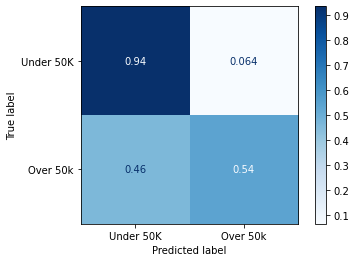

In [79]:
ConfusionMatrixDisplay.from_predictions(y_test, pred, display_labels=labels, cmap='Blues', normalize='true');

 - The above plot shows people who earned less and 50,000 yearly and the people
 - who earned more than 50,000. The highest percentage is with those who earn
 - under 50,000 yearly.

 - The production model that I have chosen is the Logistic Regression model with
 - Principal Component Analysis that gave a score of .85 or 85% accuracy that is
 - used to predict the Annual Income of individuals surveyed worldwide. This
 - model had the highest score for predicting average annual incomes.